In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.


In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [3]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('/content/drive/MyDrive/bookcamp/AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [ ]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0




* Apply the log tranform to price
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1



In [4]:
df['price'] =  np.log1p(df['price']) 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


In [7]:

y_train = df_train.price.values
y_val = df_val.price.values


In [8]:
del df_train['price']
del df_val['price']


In [ ]:
y_train

array([4.7095302 , 4.26267988, 6.13339804, ..., 3.93182563, 5.52545294,
       5.39362755])


* Now, use DictVectorizer to turn train and validation into matrices:


In [9]:
from sklearn.feature_extraction import DictVectorizer

In [10]:


dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')



In [11]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)



In [ ]:
X_train[1]

array([  0.     ,   1.     ,  40.73442, -73.95854,   5.     ,   0.     ,
         1.     ,   0.     ,   0.     ,   0.     ,   2.     ,   0.16   ,
         0.     ,   1.     ,   0.     ])


## Question 1

Let's train a decision tree regressor to predict the price variable.

* Train a model with max_depth=1



In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

In [ ]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')



Which feature is used for splitting the data?

* room_type
* neighbourhood_group
* number_of_reviews
* reviews_per_month



In [15]:
from sklearn import tree

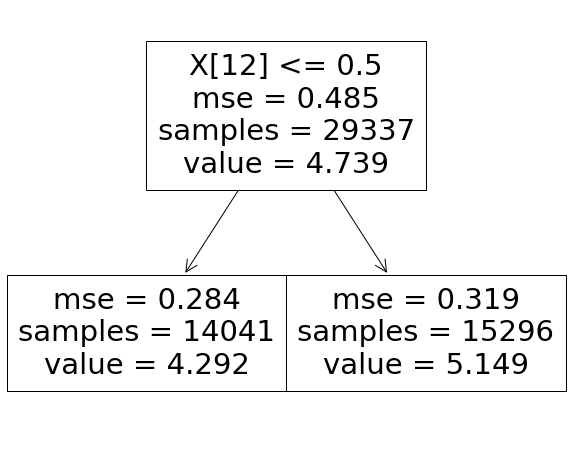

In [ ]:
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(dt)


In [ ]:
X_train[385]

array([  0.     ,   1.     ,  40.70821, -73.94719,   2.     ,   0.     ,
         1.     ,   0.     ,   0.     ,   0.     ,   9.     ,   0.25   ,
         0.     ,   1.     ,   0.     ])

In [ ]:
dict_train[385]


{'availability_365': 0,
 'calculated_host_listings_count': 1,
 'latitude': 40.70821,
 'longitude': -73.94719,
 'minimum_nights': 2,
 'neighbourhood_group': 'Brooklyn',
 'number_of_reviews': 9,
 'reviews_per_month': 0.25,
 'room_type': 'Private room'}

## ANS: room type


## Question 2

Train a random forest model with these parameters:

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)



In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1 )
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

## What's the RMSE of this model on validation?

In [32]:
rf.score(X_val , y_val)

0.5696050395088206


## Question 3

Now let's experiment with the n_estimators parameter

  *  Try different values of this parameter from 10 to 200 with step 10
  *  Set random_state to 1
  *  Evaluate the model on the validation dataset



In [ ]:
values = list(np.arange(10, 210, 10))
RMSE = []
for value in values:
  rf = RandomForestRegressor(n_estimators=value, random_state=1, n_jobs=-1 )
  rf.fit(X_train, y_train)
  s = rf.score(X_val , y_val)
  RMSE.append(round(s,2))

In [ ]:
RMSE

[0.57,
 0.59,
 0.6,
 0.6,
 0.6,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61,
 0.61]



## After which value of n_estimators does RMSE stop improving?

* 10
* 50 (ANS)
* 70 
* 120


In [ ]:
dict(zip(values, RMSE))

{10: 0.57,
 20: 0.59,
 30: 0.6,
 40: 0.6,
 50: 0.6,
 60: 0.61,
 70: 0.61,
 80: 0.61,
 90: 0.61,
 100: 0.61,
 110: 0.61,
 120: 0.61,
 130: 0.61,
 140: 0.61,
 150: 0.61,
 160: 0.61,
 170: 0.61,
 180: 0.61,
 190: 0.61,
 200: 0.61}


## Question 4

Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values, try different values of n_estimators * from 10 till 200 (with step 10)
* Fix the random seed: random_state=1



In [ ]:
max_depth_n = [10, 15, 20, 25]
values = list(np.arange(10, 210, 10))
RMSE = []
for i in max_depth_n:
  for value in values:
    rf = RandomForestRegressor(n_estimators=value, random_state=1, n_jobs=-1 , max_depth = i)
    rf.fit(X_train, y_train)
    s = rf.score(X_val , y_val)
    RMSE.append([ i ,round(s,2) ])

In [ ]:
arr = np.array(RMSE)


In [ ]:
result = np.where(arr == np.amin(arr))

In [ ]:
result

(array([40, 60]), array([1, 1]))

In [ ]:
arr[40]

array([20.  ,  0.57])

In [ ]:
dict(zip(values, RMSE))

{10.0: 0.61, 15.0: 0.61, 20.0: 0.61, 25.0: 0.61}

What's the best max_depth:

* 10
* 15
* 20 ANS
* 25



## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
  * n_estimators=10,
  * max_depth=20,
  *  random_state=1,
  * n_jobs=-1 (optional)
* Get the feature importance information from this model



In [17]:
rf = RandomForestRegressor(n_estimators=10,max_depth=20, random_state=1, n_jobs=-1 )
rf.fit(X_train, y_train)
rf.score(X_val , y_val)

0.5739346608210436

In [18]:
importances = rf.feature_importances_

In [19]:
importances

array([7.65160846e-02, 3.09063525e-02, 1.52053975e-01, 1.53219337e-01,
       5.36452300e-02, 2.83822549e-04, 1.16611621e-03, 3.40167443e-02,
       1.15324234e-03, 1.18026952e-04, 4.35248857e-02, 5.24379349e-02,
       3.91896837e-01, 4.52061759e-03, 4.54079353e-03])

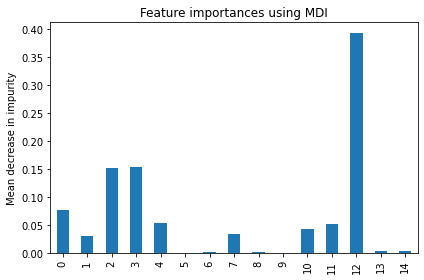

In [20]:
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

What's the most important feature?

* neighbourhood_group=Manhattan
* room_type=Entire home/apt (ANS)
* longitude
* latitude


## Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:


In [21]:
import xgboost as xgb

In [22]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [23]:


watchlist = [(dtrain, 'train'), (dval, 'val')]



In [24]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [26]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:3.02752	val-rmse:3.02415
[10]	train-rmse:0.439151	val-rmse:0.449813
[20]	train-rmse:0.417245	val-rmse:0.437226
[30]	train-rmse:0.407563	val-rmse:0.435124
[40]	train-rmse:0.401326	val-rmse:0.434602
[50]	train-rmse:0.395527	val-rmse:0.433357
[60]	train-rmse:0.388646	val-rmse:0.43327
[70]	train-rmse:0.380675	val-rmse:0.432784
[80]	train-rmse:0.374531	val-rmse:0.432804
[90]	train-rmse:0.370312	val-rmse:0.433563
[99]	train-rmse:0.36437	val-rmse:0.434066


In [27]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:3.87217	val-rmse:3.86889
[10]	train-rmse:1.41919	val-rmse:1.41798
[20]	train-rmse:0.645011	val-rmse:0.648887
[30]	train-rmse:0.461519	val-rmse:0.471089
[40]	train-rmse:0.427864	val-rmse:0.44178
[50]	train-rmse:0.418963	val-rmse:0.436207
[60]	train-rmse:0.414688	val-rmse:0.434822
[70]	train-rmse:0.410824	val-rmse:0.433942
[80]	train-rmse:0.407816	val-rmse:0.433406
[90]	train-rmse:0.405447	val-rmse:0.432963
[99]	train-rmse:0.404032	val-rmse:0.432873


In [28]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:4.25336	val-rmse:4.2501
[10]	train-rmse:3.85242	val-rmse:3.84922
[20]	train-rmse:3.4903	val-rmse:3.48718
[30]	train-rmse:3.16332	val-rmse:3.16027
[40]	train-rmse:2.86817	val-rmse:2.86532
[50]	train-rmse:2.60185	val-rmse:2.59924
[60]	train-rmse:2.36167	val-rmse:2.35927
[70]	train-rmse:2.14519	val-rmse:2.14303
[80]	train-rmse:1.95021	val-rmse:1.94831
[90]	train-rmse:1.77473	val-rmse:1.77307
[99]	train-rmse:1.63197	val-rmse:1.63049




Now change eta first to `0.1` and then to `0.01`

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1 (ANS)
* 0.01
